<a href="https://colab.research.google.com/github/datajcthemax/gitproject/blob/main/day20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20번째 이야기
- 앙상블
- Decision Tree와 Random Forest
- 깃팀플 가이드

# ML 모델에서 주요변수를 뽑는 방법

In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/datas/따릉이/train.csv')

In [4]:
data.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
y = data.pop('count')
X = data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
X = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [11]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
pred = dt_model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5488744240822189

In [14]:
data.columns, len(data.columns)

(Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
        'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
        'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
       dtype='object'),
 10)

In [15]:
dt_model.feature_importances_, dt_model.feature_importances_.shape

(array([0.02398125, 0.62163577, 0.18051905, 0.00548188, 0.01505329,
        0.0352222 , 0.02501467, 0.03651094, 0.0365866 , 0.01999436]),
 (10,))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'id'),
  Text(1, 0, 'hour'),
  Text(2, 0, 'hour_bef_temperature'),
  Text(3, 0, 'hour_bef_precipitation'),
  Text(4, 0, 'hour_bef_windspeed'),
  Text(5, 0, 'hour_bef_humidity'),
  Text(6, 0, 'hour_bef_visibility'),
  Text(7, 0, 'hour_bef_ozone'),
  Text(8, 0, 'hour_bef_pm10'),
  Text(9, 0, 'hour_bef_pm2.5')])

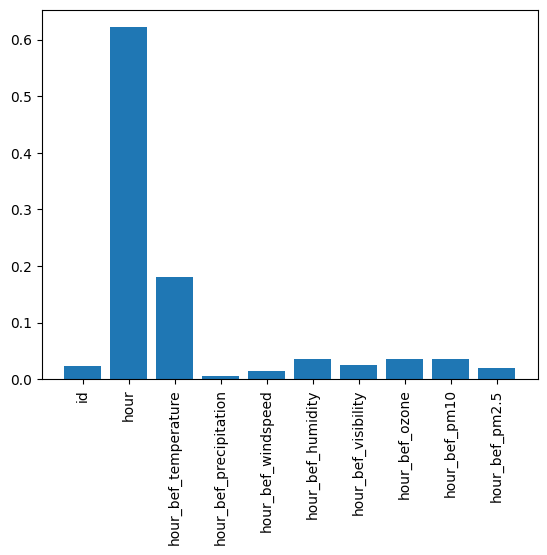

In [16]:
import matplotlib.pyplot as plt
plt.bar(data.columns, dt_model.feature_importances_)
plt.xticks(rotation=90)

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [18]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
pred = rf_model.predict(X_test)

In [20]:
r2_score(y_test, pred)

0.749602761606876

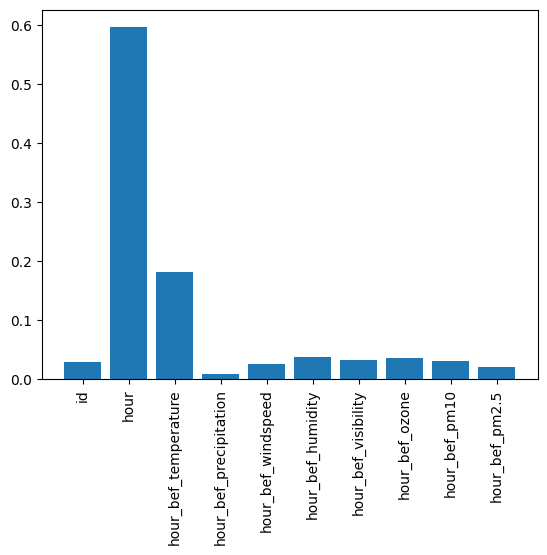

In [21]:
plt.bar(data.columns, rf_model.feature_importances_)
plt.xticks(rotation=90);